In [160]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib
import ast
#import swifter
%matplotlib inline

In [2]:
df=pd.read_csv("followerlist_hololive_200412.csv",sep=",",header=None)

In [6]:
# リストの分解
arr=[]
arr2=[]
for i in range(df[1].shape[0]):
    arr.append(df[1].apply(lambda x: x[1:-1].split(','))[i])
    arr2.extend(df[1].apply(lambda x: x[1:-1].split(','))[i])
    
#ユニークユーザ数の確認
colids=list(set(arr2))

#tweateridをidに変換
d={}
for num,i in enumerate(colids):
    d[i]=num
    
#dataframe作成用
newdf=np.zeros((len(arr),len(colids)))
for num2,j in enumerate(arr):
    for k in j:
        newdf[num2][d[k]]=1

In [11]:
df_m=pd.DataFrame()
df_m["name"]=df[0]
df_m["num_follower"]=pd.DataFrame(newdf).sum(axis=1)
df_m=pd.concat([df_m,pd.DataFrame(newdf)],axis=1)

In [13]:
# メインでないチャンネルの削除と整形
df_m=df_m[(df_m["num_follower"]>80000) | (df_m["name"]=="AZKi")].sort_values(by="num_follower")
df_m["name"]=df_m["name"].apply(lambda x:x.split("(")[0])

In [14]:
df_m

,name,num_follower,0,1,2,3,4,5,6,7,...,748235,748236,748237,748238,748239,748240,748241,748242,748243,748244
8,AZKi,56667.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,常闇トワ,84625.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,姫森ルーナ,85670.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,アキ・ローゼンタール,94957.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10,夜空メル,99585.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,不知火フレア,106921.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,角巻わため,114877.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,天音かなた,128035.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,友人A,128581.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,癒月ちょこ,141020.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
cor=df_m.iloc[:,2:].T.corr()

In [169]:
corresult=pd.DataFrame(cor).reset_index(drop=True)
corresult=corresult.set_index(df_m["name"])
corresult.columns=df_m["name"].values

In [234]:
corresult.to_csv("cor_matrix_hololive.csv",index=False)

In [137]:

G = nx.path_graph(4)  # or DiGraph, MultiGraph, MultiDiGraph, etc
[(n, nbrdict) for n, nbrdict in G.adjacency()]

[(0, {1: {}}), (1, {0: {}, 2: {}}), (2, {1: {}, 3: {}}), (3, {2: {}})]

In [142]:
import networkx as nx
G=nx.from_numpy_matrix(np.array(A))

In [156]:
labels={}
for num,i in enumerate(df_m["name"].values):
    labels[num]=i

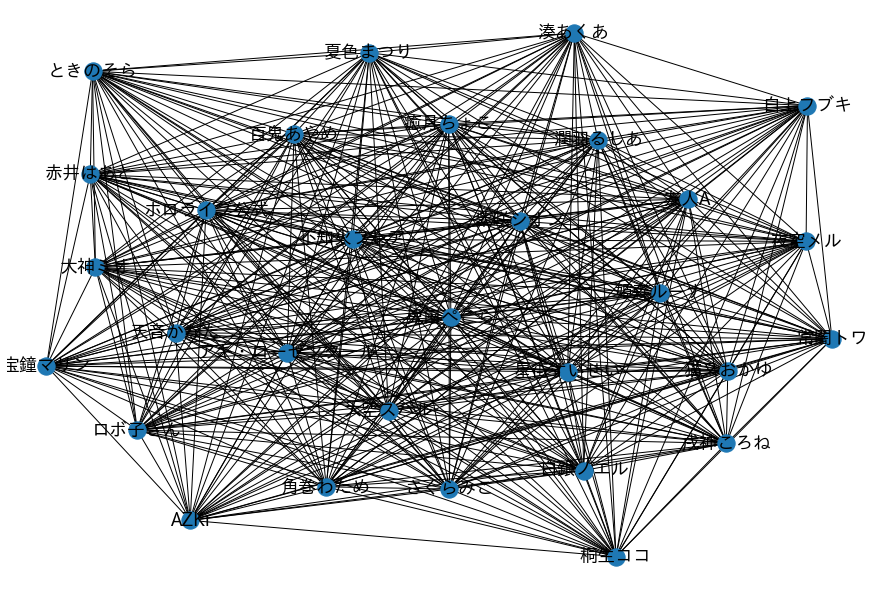

In [229]:
#nx.draw(G, with_labels=True,labels=labels,font_family="IPAexGothic",node_color=range(30),font_color="r")
plt.figure(figsize=(12,8))
nx.draw(G, with_labels=True,labels=labels,font_family="IPAexGothic",font_size=18,font_color="black")

#pos=nx.spring_layout(G)
#nx.draw_networkx_labels(G,pos,labels=labels,font_size=16)

In [24]:
A=cor-np.diag([1 for _ in range(len(cor))])

In [26]:
D= np.diag(A.sum(axis=1))

In [104]:
#ラプラシアン行列
L = D-A

In [105]:
pd.DataFrame(L)

,8,5,6,7,10,9,11,12,0,19,...,24,14,25,29,27,26,31,28,32,33
8,11.705950,-0.488919,-0.482867,-0.538572,-0.522197,-0.489726,-0.423344,-0.404984,-0.465825,-0.435001,...,-0.373268,-0.389295,-0.375711,-0.363877,-0.366289,-0.357477,-0.364667,-0.320119,-0.268385,-0.242081
5,-0.488919,15.120936,-0.756102,-0.594917,-0.558866,-0.653593,-0.703368,-0.680984,-0.536861,-0.503534,...,-0.514918,-0.495663,-0.521733,-0.446117,-0.455375,-0.507314,-0.341595,-0.415007,-0.358197,-0.321637
6,-0.482867,-0.756102,15.113345,-0.596830,-0.558430,-0.641168,-0.710462,-0.672149,-0.533935,-0.500752,...,-0.512677,-0.484403,-0.527176,-0.441984,-0.457264,-0.510858,-0.346903,-0.419290,-0.361206,-0.318257
7,-0.538572,-0.594917,-0.596830,15.347363,-0.707353,-0.631102,-0.547964,-0.520098,-0.561748,-0.595389,...,-0.492015,-0.547808,-0.513642,-0.471908,-0.537122,-0.470701,-0.431994,-0.458106,-0.391555,-0.355397
10,-0.522197,-0.558866,-0.558430,-0.707353,14.646666,-0.588864,-0.503407,-0.484856,-0.527377,-0.605923,...,-0.471108,-0.538782,-0.488714,-0.453422,-0.516729,-0.443773,-0.416464,-0.440869,-0.375007,-0.337751
9,-0.489726,-0.653593,-0.641168,-0.631102,-0.588864,16.068179,-0.633969,-0.611245,-0.577163,-0.552162,...,-0.632303,-0.549655,-0.589215,-0.479616,-0.482919,-0.606500,-0.356326,-0.453412,-0.392873,-0.361180
11,-0.423344,-0.703368,-0.710462,-0.547964,-0.503407,-0.633969,15.062731,-0.716761,-0.526664,-0.467474,...,-0.525406,-0.487068,-0.554036,-0.449427,-0.456423,-0.541837,-0.306097,-0.419919,-0.372569,-0.336283
12,-0.404984,-0.680984,-0.672149,-0.520098,-0.484856,-0.611245,-0.716761,14.875763,-0.519982,-0.455724,...,-0.521387,-0.492210,-0.546489,-0.456262,-0.446382,-0.536490,-0.293361,-0.434476,-0.379957,-0.354511
0,-0.465825,-0.536861,-0.533935,-0.561748,-0.527377,-0.577163,-0.526664,-0.519982,14.203293,-0.491282,...,-0.466917,-0.480584,-0.502302,-0.481948,-0.433065,-0.475122,-0.462788,-0.424278,-0.338148,-0.340274
19,-0.435001,-0.503534,-0.500752,-0.595389,-0.605923,-0.552162,-0.467474,-0.455724,-0.491282,13.883736,...,-0.479385,-0.520627,-0.471439,-0.427794,-0.491677,-0.441961,-0.359328,-0.468207,-0.388605,-0.354271


In [44]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler() # インスタンスの作成
L = ss.fit_transform(L) 

In [111]:
from scipy.sparse import csgraph
a,b=csgraph.laplacian(np.array(A), normed=True,return_diag=True)

In [112]:
a

array([[ 1.        , -0.03674892, -0.03630308, -0.04018123, -0.03988059,
        -0.03570806, -0.03188143, -0.03068986, -0.03612643, -0.03412197,
        -0.02831521, -0.03277731, -0.03375943, -0.03529075, -0.03204769,
        -0.03121019, -0.02960978, -0.03010105, -0.0287371 , -0.02963019,
        -0.02960321, -0.02986336, -0.02859447, -0.02978883, -0.02955443,
        -0.02833798, -0.03509091, -0.02628336, -0.02368404, -0.02207212],
       [-0.03674892,  1.        , -0.05001622, -0.03905259, -0.03755339,
        -0.04193096, -0.04660595, -0.04540542, -0.03663347, -0.03475251,
        -0.03914926, -0.03627383, -0.03869623, -0.03384246, -0.03404124,
        -0.0346306 , -0.03716368, -0.03397373, -0.03592535, -0.03457065,
        -0.03593113, -0.03345497, -0.03493742, -0.03213378, -0.03232827,
        -0.03538437, -0.0289217 , -0.0299805 , -0.02781208, -0.02580262],
       [-0.03630308, -0.05001622,  1.        , -0.03918801, -0.03753348,
        -0.04114414, -0.04708785, -0.04482758, -0

In [113]:
vals, vecs = np.linalg.eig(a)
#vals, vecs = np.linalg.eig(L)

In [217]:
from scipy import linalg
l, v = linalg.eig(a) #昇順で結果が出る

In [213]:
from scipy.sparse.linalg import eigsh
eigenvalues, eigenvectors = eigsh(a, k=6)

In [214]:
eigenvalues

array([1.04658723, 1.0468062 , 1.04778709, 1.04786273, 1.04887093,
       1.05032577])

In [216]:
eigenvectors[0]

array([ 0.04824741,  0.14616553,  0.10682624, -0.02817681,  0.04674343,
        0.01640123])

In [114]:
# sort these based on the eigenvalues
vecs = vecs[:,np.argsort(vals)]
vals = vals[np.argsort(vals)]

In [182]:
vecs[0]

array([-0.16797896, -0.06693378, -0.33918004,  0.05057882,  0.08482641,
       -0.11063135,  0.12034295, -0.23358037, -0.37004038,  0.49532722,
        0.19847504, -0.05647346,  0.14599824,  0.34304481, -0.06678207,
        0.08197647, -0.10634455,  0.34028973,  0.00412903,  0.02575411,
        0.12690342, -0.04029047,  0.01269385,  0.04649113,  0.04824741,
        0.14616553,  0.10682624,  0.02817681,  0.04674343, -0.01640123])

In [183]:
vecs[-1]

array([-0.15738551,  0.32673797,  0.20873444,  0.24516111, -0.26316829,
        0.02540011,  0.37379479,  0.14318231, -0.02466522,  0.19648781,
       -0.17410272, -0.34818241,  0.00964032,  0.07906935,  0.10802808,
        0.04464712,  0.18497817, -0.09487081, -0.18070817, -0.07054606,
        0.25401901, -0.11419367,  0.22925184,  0.0227312 ,  0.20008185,
       -0.24740335, -0.06906323,  0.05212388, -0.05406811,  0.02765889])

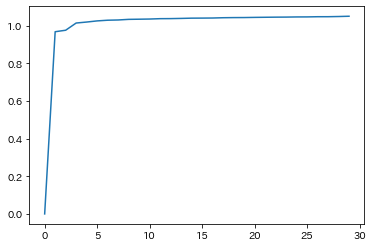

In [116]:
pd.Series(vals).plot()

In [196]:
# kmeans on first three vectors with nonzero eigenvalues
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6,random_state=0)
kmeans.fit(vecs[:,:6])
colors = kmeans.labels_

print("Clusters:", colors)

Clusters: [4 1 1 4 4 0 1 1 3 4 1 0 0 3 2 2 0 5 0 2 0 2 2 3 5 0 3 5 5 5]


In [197]:
result=pd.DataFrame()
result["name"]=df_m["name"]
result["clus"]=colors

In [201]:
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(6, affinity='precomputed', n_init=100,assign_labels='discretize')
#sc = SpectralClustering(8, affinity='precomputed', n_init=100,assign_labels='kmeans',random_state=0)
sc.fit_predict(A) 

array([0, 2, 2, 0, 0, 3, 2, 2, 4, 0, 2, 3, 3, 4, 1, 1, 3, 5, 3, 1, 3, 1,
       1, 4, 5, 3, 4, 5, 5, 5])

In [202]:
result["clus2"]=sc.fit_predict(A) 

In [203]:
result.sort_values(by=["clus","clus2"])

,name,clus,clus2
9,不知火フレア,0,4
21,さくらみこ,0,4
20,星街すいせい,0,4
18,潤羽るしあ,0,4
23,兎田ぺこら,0,4
24,白銀ノエル,0,4
26,宝鐘マリン,0,4
5,常闇トワ,1,0
6,姫森ルーナ,1,0
11,角巻わため,1,0


In [ ]:
nx.draw_networkx(W, node_color=sc.labels_, cmap=plt.cm.rainbow, labels={d[0]: f'{i}: {d[0]}' for i, d in enumerate(W.nodes(data=True))})